# Neural & Behavioral Modeling - Week 7 (Exercises)

In [2]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 A Two-layered Linear Network as a Regression Model (7 points)
Data fitting of the following network is poor. Please check if adding bias terms or chaging network hyperparameters (e.g., learning rate, amount of training, etc.) help. If not, please explain why the fitting is poor given that the network/regression model has sufficient degrees of freedom (i.e., network weights or regression coefficients) to overfit such a small data set.

Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.679 -0.   ]
 [ 0.643  0.   ]
 [ 1.321  0.   ]
 [-0.     0.643]
 [ 0.     0.643]
 [ 0.     1.286]]


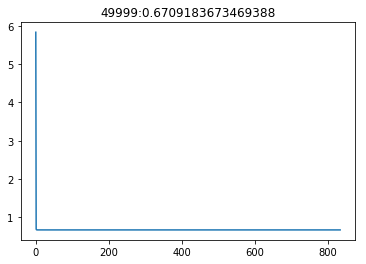

In [3]:
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)

X=array([[1,0,0,0],[0,1,0,0],[1,1,0,0],[0,0,1,0],[0,0,0,1],[0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
W=random.rand(Ny,Nx); # set initially random connectivity matrix
#print(W)
eta=.1; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(Np); # choose a traing pattern at random
    
    # Forward propagation:
    y=W.dot(X[p])
    
    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
    W=W+deltaW;  # apply the weight update
    
    
    #print(W)
    #print(Y[p].T-y)

    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        predY=W.dot(X.T) # testing ALL the training samples
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)

    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY.T) # predicted Y

### First, try the models with bias terms

##### Change the input from [X] to [b,X]

Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.849  0.151]
 [ 0.811  0.189]
 [ 1.151 -0.151]
 [ 0.189  0.811]
 [ 0.208  0.792]
 [-0.113  1.113]]


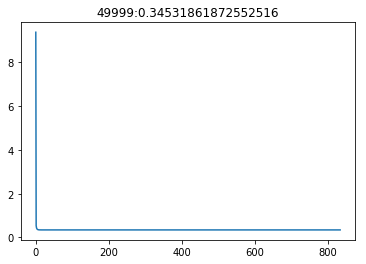

In [4]:
### Write your codes with bias terms here

# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)
b = 1
X=array([[b,1,0,0,0],[b,0,1,0,0],[b,1,1,0,0],[b,0,0,1,0],[b,0,0,0,1],[b,0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
W=random.rand(Ny,Nx); # set initially random connectivity matrix
#print(W)
eta=.1; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(Np); # choose a traing pattern at random
    
    # Forward propagation:
    y=W.dot(X[p])
    
    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
    W=W+deltaW;  # apply the weight update
    
    
    #print(W)
    #print(Y[p].T-y)

    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        predY=W.dot(X.T) # testing ALL the training samples
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)

    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY.T) # predicted Y

It turns that the model with bias terms: <br>
behaves better when y = 1 (y_pred = 0.8~1.1 compared to y = 0.6~1.3 without bias), but <br>
behaves worse when y = 0 (y_pred = -0.15~0.2 compared to y = 0 without bias) <br>
In general, the fitting is still poor

### How about changing the learning rate?

##### Try learning rate = .05, .2, and .4

Learning rate = 0.05
Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.841  0.159]
 [ 0.823  0.177]
 [ 1.159 -0.159]
 [ 0.177  0.823]
 [ 0.186  0.814]
 [-0.142  1.142]]


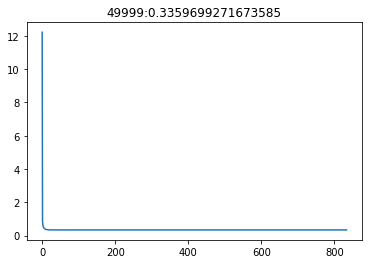

In [11]:
### Write your codes with bias terms here
print("Learning rate = 0.05")
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)
b = 1
X=array([[b,1,0,0,0],[b,0,1,0,0],[b,1,1,0,0],[b,0,0,1,0],[b,0,0,0,1],[b,0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
W=random.rand(Ny,Nx); # set initially random connectivity matrix
#print(W)
eta=.05; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(Np); # choose a traing pattern at random
    
    # Forward propagation:
    y=W.dot(X[p])
    
    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
    W=W+deltaW;  # apply the weight update
    
    
    #print(W)
    #print(Y[p].T-y)

    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        predY=W.dot(X.T) # testing ALL the training samples
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)

    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY.T) # predicted Y

Learning rate = 0.2
Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.87   0.13 ]
 [ 0.783  0.217]
 [ 1.13  -0.13 ]
 [ 0.217  0.783]
 [ 0.261  0.739]
 [-0.043  1.043]]


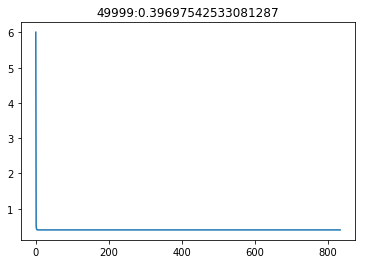

In [12]:
### Write your codes with bias terms here
print("Learning rate = 0.2")
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)
b = 1
X=array([[b,1,0,0,0],[b,0,1,0,0],[b,1,1,0,0],[b,0,0,1,0],[b,0,0,0,1],[b,0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
W=random.rand(Ny,Nx); # set initially random connectivity matrix
#print(W)
eta=.2; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(Np); # choose a traing pattern at random
    
    # Forward propagation:
    y=W.dot(X[p])
    
    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
    W=W+deltaW;  # apply the weight update
    
    
    #print(W)
    #print(Y[p].T-y)

    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        predY=W.dot(X.T) # testing ALL the training samples
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)

    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY.T) # predicted Y

Learning rate = 0.4
Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.938  0.062]
 [ 0.687  0.312]
 [ 1.062 -0.062]
 [ 0.312  0.687]
 [ 0.437  0.562]
 [ 0.188  0.812]]


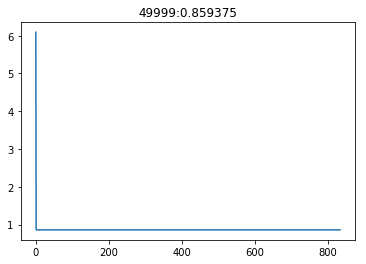

In [14]:
### Write your codes with bias terms here
print("Learning rate = 0.4")
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)
b = 1
X=array([[b,1,0,0,0],[b,0,1,0,0],[b,1,1,0,0],[b,0,0,1,0],[b,0,0,0,1],[b,0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
W=random.rand(Ny,Nx); # set initially random connectivity matrix
#print(W)
eta=.4; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(Np); # choose a traing pattern at random
    
    # Forward propagation:
    y=W.dot(X[p])
    
    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
    W=W+deltaW;  # apply the weight update
    
    
    #print(W)
    #print(Y[p].T-y)

    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        predY=W.dot(X.T) # testing ALL the training samples
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)

    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY.T) # predicted Y

Still, the fitting are not satisfying!

### Changing the amount of training 

##### learning rate = 0.1, the amount of training = 200, 10000, 40000(original), 80000

The amount of training = 200
Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.775  0.084]
 [ 0.723  0.12 ]
 [ 1.275 -0.045]
 [ 0.108  0.74 ]
 [ 0.112  0.716]
 [-0.003  1.206]]


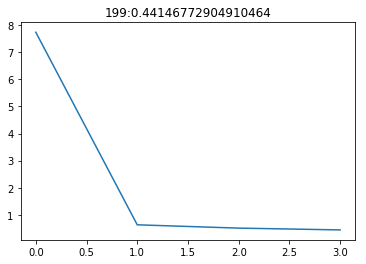

In [29]:
### Write your codes with bias terms here
print("The amount of training = 200")
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)
b = 1
X=array([[b,1,0,0,0],[b,0,1,0,0],[b,1,1,0,0],[b,0,0,1,0],[b,0,0,0,1],[b,0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
W=random.rand(Ny,Nx); # set initially random connectivity matrix
#print(W)
eta=.1; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=200; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(Np); # choose a traing pattern at random
    
    # Forward propagation:
    y=W.dot(X[p])
    
    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
    W=W+deltaW;  # apply the weight update
    
    
    #print(W)
    #print(Y[p].T-y)

    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        predY=W.dot(X.T) # testing ALL the training samples
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)

    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY.T) # predicted Y

The amount of training = 10000
Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.849  0.151]
 [ 0.811  0.189]
 [ 1.151 -0.151]
 [ 0.189  0.811]
 [ 0.208  0.792]
 [-0.113  1.113]]


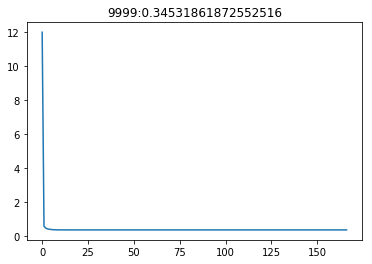

In [30]:
### Write your codes with bias terms here
print("The amount of training = 10000")
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)
b = 1
X=array([[b,1,0,0,0],[b,0,1,0,0],[b,1,1,0,0],[b,0,0,1,0],[b,0,0,0,1],[b,0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
W=random.rand(Ny,Nx); # set initially random connectivity matrix
#print(W)
eta=.1; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=10000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(Np); # choose a traing pattern at random
    
    # Forward propagation:
    y=W.dot(X[p])
    
    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
    W=W+deltaW;  # apply the weight update
    
    
    #print(W)
    #print(Y[p].T-y)

    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        predY=W.dot(X.T) # testing ALL the training samples
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)

    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY.T) # predicted Y

The amount of training = 40000
Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.849  0.151]
 [ 0.811  0.189]
 [ 1.151 -0.151]
 [ 0.189  0.811]
 [ 0.208  0.792]
 [-0.113  1.113]]


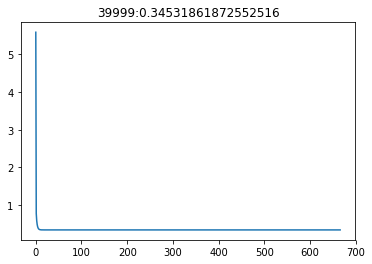

In [31]:
### Write your codes with bias terms here
print("The amount of training = 40000")
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)
b = 1
X=array([[b,1,0,0,0],[b,0,1,0,0],[b,1,1,0,0],[b,0,0,1,0],[b,0,0,0,1],[b,0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
W=random.rand(Ny,Nx); # set initially random connectivity matrix
#print(W)
eta=.1; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=40000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(Np); # choose a traing pattern at random
    
    # Forward propagation:
    y=W.dot(X[p])
    
    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
    W=W+deltaW;  # apply the weight update
    
    
    #print(W)
    #print(Y[p].T-y)

    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        predY=W.dot(X.T) # testing ALL the training samples
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)

    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY.T) # predicted Y

The amount of training = 80000
Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.849  0.151]
 [ 0.811  0.189]
 [ 1.151 -0.151]
 [ 0.189  0.811]
 [ 0.208  0.792]
 [-0.113  1.113]]


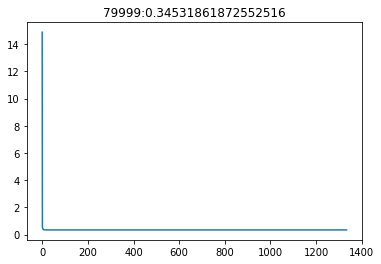

In [32]:
### Write your codes with bias terms here
print("The amount of training = 80000")
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)
b = 1
X=array([[b,1,0,0,0],[b,0,1,0,0],[b,1,1,0,0],[b,0,0,1,0],[b,0,0,0,1],[b,0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
W=random.rand(Ny,Nx); # set initially random connectivity matrix
#print(W)
eta=.1; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=80000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(Np); # choose a traing pattern at random
    
    # Forward propagation:
    y=W.dot(X[p])
    
    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
    W=W+deltaW;  # apply the weight update
    
    
    #print(W)
    #print(Y[p].T-y)

    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        predY=W.dot(X.T) # testing ALL the training samples
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)

    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY.T) # predicted Y

Summary: iteration = 10000 is enough for training, since the result are the same in iteration = 40000, 80000

Interestingly, iternation = 200 is not enough for the bias term to drive y1 + y2 = 1


### In sum, it seems that the network is poor to fit the data, irrespective of bias terms included, learning rates, or the amount of training, so what happened?

##### To tackle this, the training details when training trial = 39900 (100th trial beforce the training ends) ~ 39903 (97 trial before the training ends) are printed out:



c = 39900
preW
[[ 0.491  0.321  0.302 -0.321 -0.302]
 [ 0.509 -0.321 -0.302  0.321  0.302]]
X[p]
[1 1 0 0 0]
predY
[[ 0.849  0.811  1.151  0.189  0.208 -0.113]
 [ 0.151  0.189 -0.151  0.811  0.792  1.113]]
Y[p].T
[1 0]
deltaW
[[ 0.019  0.019  0.     0.     0.   ]
 [-0.019 -0.019 -0.    -0.    -0.   ]]
W
[[ 0.509  0.34   0.302 -0.321 -0.302]
 [ 0.491 -0.34  -0.302  0.321  0.302]]


c = 39901
preW
[[ 0.509  0.34   0.302 -0.321 -0.302]
 [ 0.491 -0.34  -0.302  0.321  0.302]]
X[p]
[1 0 1 0 0]
predY
[[ 0.849  0.811  1.151  0.189  0.208 -0.113]
 [ 0.151  0.189 -0.151  0.811  0.792  1.113]]
Y[p].T
[1 0]
deltaW
[[ 0.019  0.     0.019  0.     0.   ]
 [-0.019 -0.    -0.019 -0.    -0.   ]]
W
[[ 0.528  0.34   0.321 -0.321 -0.302]
 [ 0.472 -0.34  -0.321  0.321  0.302]]


c = 39902
preW
[[ 0.528  0.34   0.321 -0.321 -0.302]
 [ 0.472 -0.34  -0.321  0.321  0.302]]
X[p]
[1 1 1 0 0]
predY
[[ 0.849  0.811  1.151  0.189  0.208 -0.113]
 [ 0.151  0.189 -0.151  0.811  0.792  1.113]]
Y[p].T
[1 0]
deltaW
[[-0.0

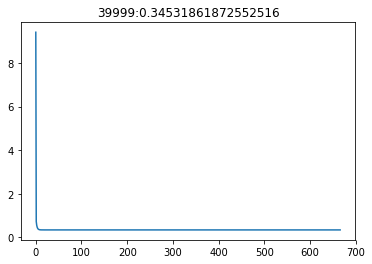

In [28]:
### Write your codes with bias terms here

# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)
b = 1
X=array([[b,1,0,0,0],[b,0,1,0,0],[b,1,1,0,0],[b,0,0,1,0],[b,0,0,0,1],[b,0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
W=random.rand(Ny,Nx); # set initially random connectivity matrix
#print(W)
eta=.1; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=40000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(Np); # choose a traing pattern at random
    
    # Forward propagation:
    y=W.dot(X[p])
    
    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
    preW = W
    W=W+deltaW;  # apply the weight update
    
    
    #print(W)
    #print(Y[p].T-y)

    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        predY=W.dot(X.T) # testing ALL the training samples
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)
        
    if c > 39899 and c < 39903:
        print("c = "+str(c))
        print("preW")
        print(preW)
        print("X[p]")
        print(X[p])
        print("predY")
        print(predY)
        print("Y[p].T")
        print(Y[p].T)
        print("deltaW")
        print(deltaW)
        print("W")
        print(W)
        print("\n")

    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('\nIdeal results:')
print(Y)
print('Reality:')
print(predY.T) # predicted Y

#### Trial = 39900
Since x = [1 1 0 0 0], y = [1,0] only weightings of bias to y and x1 to y are updated:<br>
EX. b1: 0.491 -> 0.509; x11: 0.321 -> 0.34, due to a positive prediction error (1-0.81)

#### Trial = 39901
Since x = [1 0 1 0 0], y = [1,0] only weightings of bias to y and x2 to y are updated:<br>
EX. b1: 0.509 -> 0.528; x21: 0.302 -> 0.321, due to a positive prediction error (1-0.81)

#### Trial = 39902
Since x = [1 1 1 0 0], y = [1,0] weightings of bias to y and x1 to y are updated:<br>
At this trial, all the updated weighting linearly contributed to the prediction: b1 + x11 + x21 = 1.19, which result in a negative prediction error (1-1.19), whose magntidue is the same as of those in trial 39900 and 39901. Therefore, all the updated weighting are canceled out and go back to those of trial = 39899.

The root cause is that the prediction, that is, the activation function is **linear**, which intrinsically cannot fit the nonlinear pattern in the data (1,0)->1, (0,1)->1, (1,1)->1. Only if we change into **nonlinear** activation function (Ex. sigmoid function in the 07_examples) can we significantly improve the fitting:  


[[0.965 0.035]
 [0.965 0.035]
 [0.999 0.001]
 [0.035 0.965]
 [0.035 0.965]
 [0.001 0.999]]


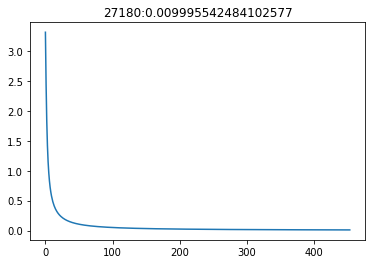

In [37]:
# Here we train a two-layered network of units 
# with the sigmoid/logistic activation function f
# to associate patterns using the delta rule dW=(t-y)*(df/dx)*x

set_printoptions(precision=3,suppress=True)

X=matrix('1 0 0 0;0 1 0 0;1 1 0 0;0 0 1 0;0 0 0 1;0 0 1 1')
Y=matrix('1 0;1 0;1 0;0 1;0 1;0 1')
#Y=matrix('0.3 0;0.5 0;0.7 0;0 0.3;0 0.5;0 0.7') # try continuous values
[Np,Nx]=X.shape; # find numbers of patterns and inputs 
[Np,Ny]=Y.shape; # find numbers of patterns and outputs 
W=asmatrix(random.rand(Ny,Nx)-0.5); # set initially random connectivity matrix

eta=0.1; # set the learning rate # try 0.1
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[]

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(nP); # choose pattern pair at random
    
    # Forward propagation:
    y0=W*X[p].T
    y=1/(1+exp(-y0)) # activation function
    
    # Backward propagation:
    dy=multiply(y,1-y); # compute the derivative of the sigmoid function
    e=Y[p].T-y; # error e for the chosen input
    deltaW=eta*outer(multiply(e,dy),X[p])
    W=W+deltaW;  # apply the weight update
    
    # Checking if done:
    if(mod(c,10*Np)==0): # after several updates check maximum error
        h=W*X.T # testing all the training samples
        predY=1/(1+exp(-h))
        totErr=sum(multiply(Y.T-predY,Y.T-predY))
        totErr_hist.append(totErr)
    if(totErr<tol): # one training sample reaches stopping criterion
        break # break if max error is below tolerance

plot(totErr_hist);
title(str(c)+':'+str(totErr));
print(predY.T) # predicted Y

## 2 PyTorch (3 points)
Read <a href="https://www.pytorchtutorial.com/pytorch-for-numpy-users/">this tutorial</a> first and port the following Instar Learning from NumPy to PyTorch:

In [35]:
# Instar learning:
x=array([0.1,0.3,0.6])
W=random.rand(3)
for i in range(10): # trials 
    y=dot(W,x) 
    W+=y*(x-W) # postsynaptically gated InStar 
    print(W,y)

[0.561 0.375 0.281] 0.28738413218333725
[0.406 0.349 0.388] 0.33699119355690255
[0.29  0.331 0.468] 0.37844407805817193
[0.212 0.318 0.522] 0.40930843374763126
[0.164 0.31  0.556] 0.4300569193346026
[0.136 0.306 0.575] 0.4429341483609509
[0.12  0.303 0.586] 0.4504931968227474
[0.111 0.302 0.593] 0.45477594697763263
[0.106 0.301 0.596] 0.4571517206379411
[0.103 0.301 0.598] 0.4584538164491638


In [36]:
### Write your PyTorch codes here
import torch as t
x=t.tensor([0.1,0.3,0.6])
W=t.rand(3)
for i in range(10): # trials 
    y=t.dot(W,x) 
    W+=y*(x-W) # postsynaptically gated InStar 
    print(W,y)

tensor([0.1124, 0.2222, 0.5593]) tensor(0.3844)
tensor([0.1073, 0.2544, 0.5761]) tensor(0.4135)
tensor([0.1041, 0.2741, 0.5865]) tensor(0.4327)
tensor([0.1023, 0.2856, 0.5925]) tensor(0.4445)
tensor([0.1013, 0.2921, 0.5959]) tensor(0.4514)
tensor([0.1007, 0.2957, 0.5978]) tensor(0.4553)
tensor([0.1004, 0.2977, 0.5988]) tensor(0.4574)
tensor([0.1002, 0.2987, 0.5993]) tensor(0.4586)
tensor([0.1001, 0.2993, 0.5996]) tensor(0.4592)
tensor([0.1001, 0.2996, 0.5998]) tensor(0.4596)
